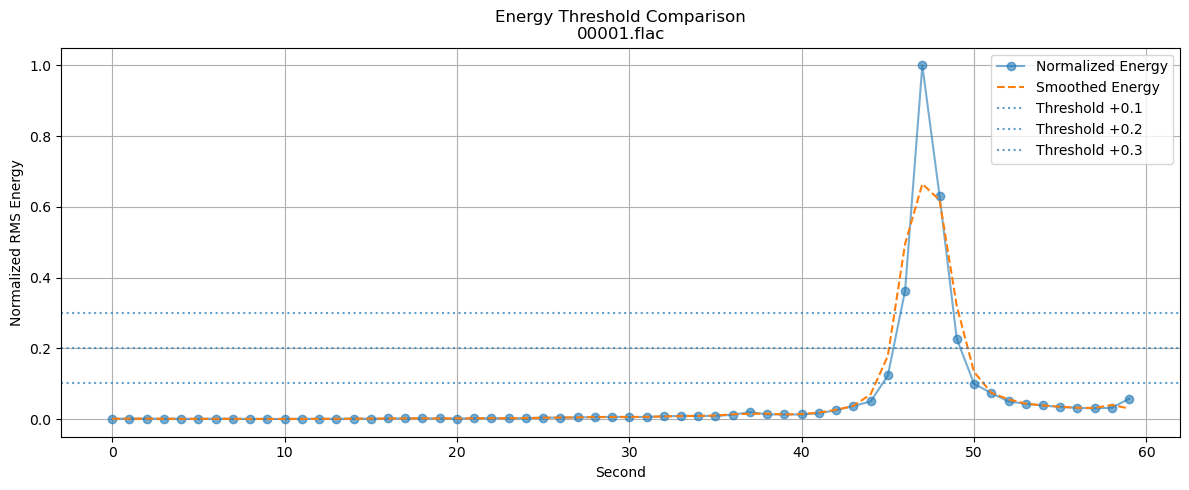

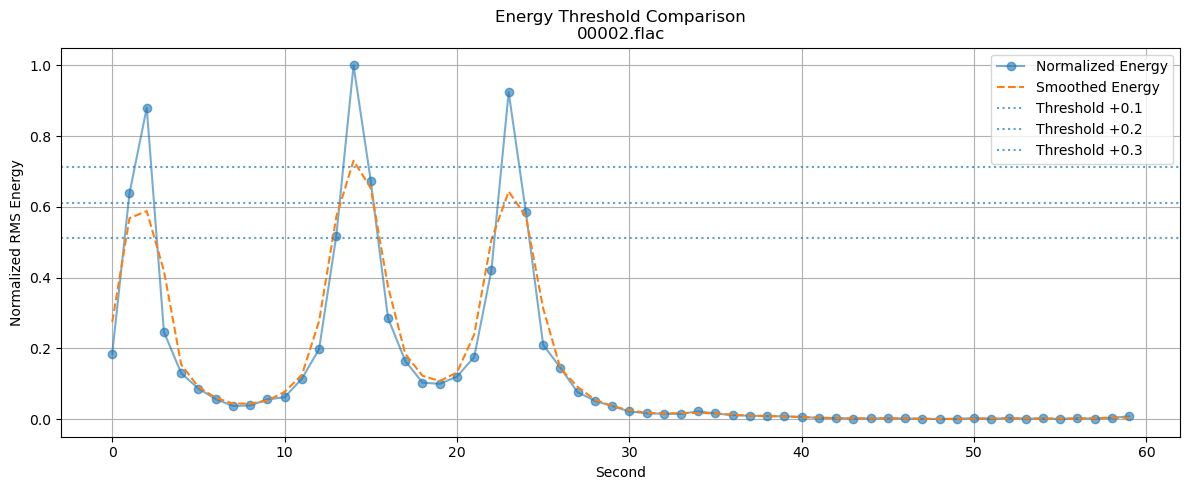

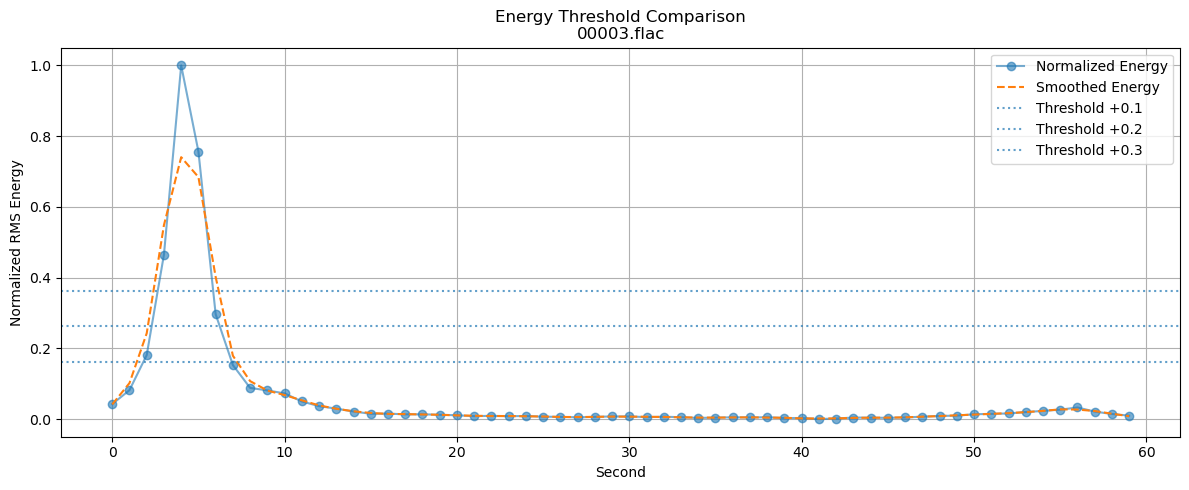

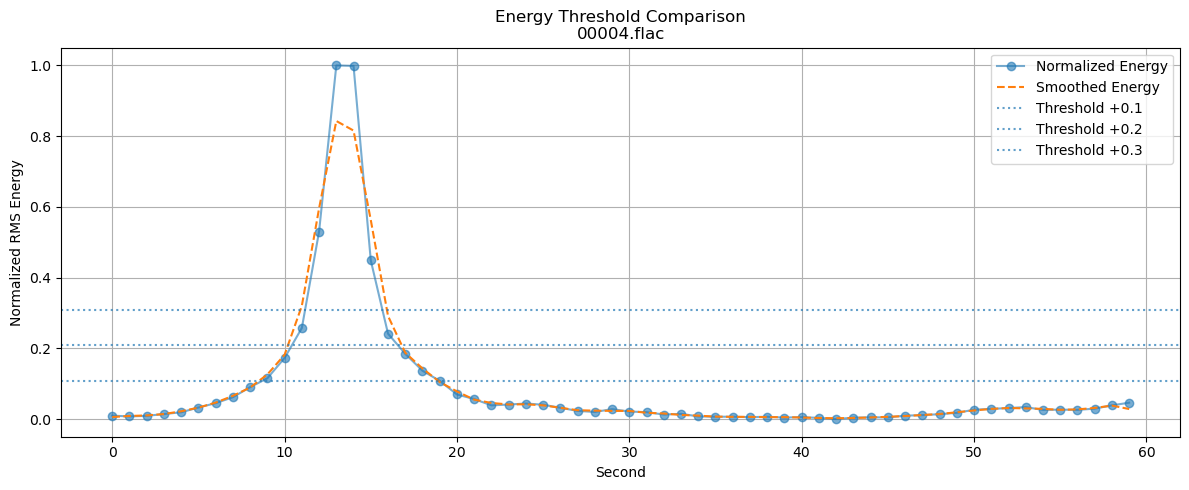

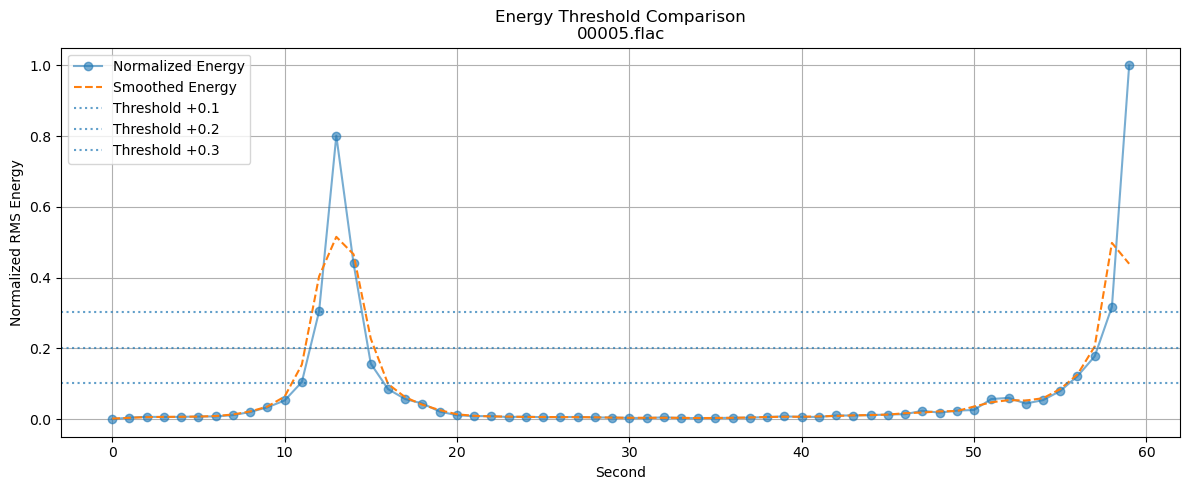

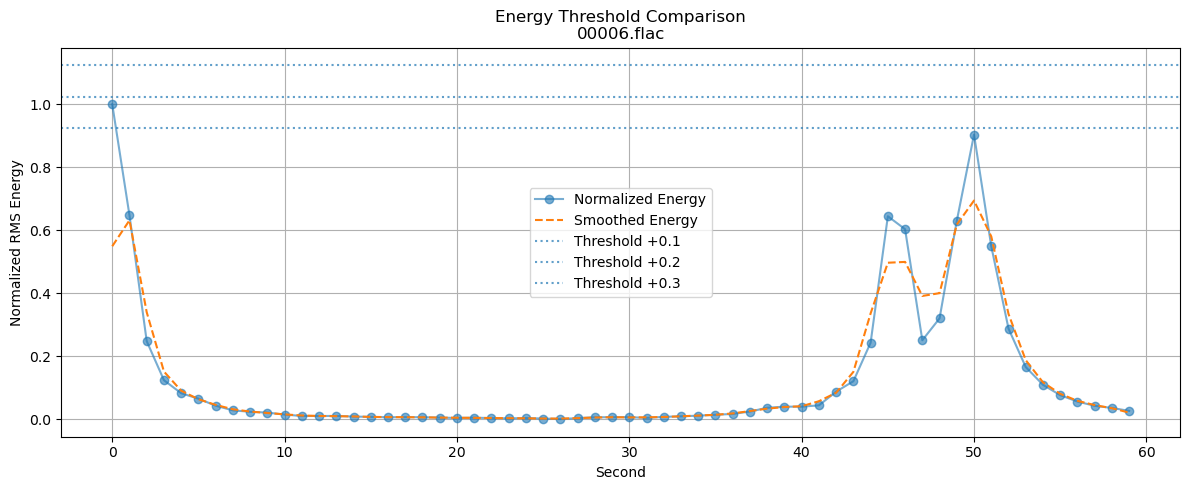

In [7]:
import os
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Normalize energy values to [0, 1]
def normalize_energy(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr) + 1e-8)

# Plot energy curve and compare thresholds at different ratios
def plot_energy_threshold_comparison(file_path, threshold_ratios=[0.1, 0.2, 0.3], sr=16000, segment_duration=1.0, baseline_secs=2):
    samples_per_segment = int(sr * segment_duration)
    
    # Load audio
    y, file_sr = sf.read(file_path)
    if file_sr != sr:
        raise ValueError(f"Sample rate mismatch: expected {sr}, got {file_sr}")
        
    # Trim audio to full seconds
    y = y[:len(y) // samples_per_segment * samples_per_segment]
    num_segments = len(y) // samples_per_segment

    # Calculate RMS energy for each second
    energies = np.array([
        np.sqrt(np.mean(y[i * samples_per_segment:(i + 1) * samples_per_segment] ** 2))
        for i in range(num_segments)
    ])
    
    energies_norm = normalize_energy(energies)

    # Smooth the energy sequence (3-point moving average)
    smoothed = convolve(energies_norm, np.ones(3) / 3, mode='same')

    # Use the first few seconds to determine baseline energy
    baseline = np.mean(energies_norm[:baseline_secs])

    # Plot energy curves and thresholds
    plt.figure(figsize=(12, 5))
    plt.plot(energies_norm, label="Normalized Energy", marker='o', alpha=0.6)
    plt.plot(smoothed, label="Smoothed Energy", linestyle='--')

    for ratio in threshold_ratios:
        threshold = baseline + ratio
        plt.axhline(threshold, linestyle=':', label=f"Threshold +{ratio}", alpha=0.7)

    plt.title(f"Energy Threshold Comparison\n{os.path.basename(file_path)}")
    plt.xlabel("Second")
    plt.ylabel("Normalized RMS Energy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Example Usage ===
file_list = [
    "D:/DATA/loc1/train/00001.flac",
    "D:/DATA/loc1/train/00002.flac",
    "D:/DATA/loc1/train/00003.flac",
    "D:/DATA/loc1/train/00004.flac",
    "D:/DATA/loc1/train/00005.flac",
    "D:/DATA/loc1/train/00006.flac",
]

for file in file_list:
    plot_energy_threshold_comparison(file)
